In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# set to be lower priority
os.nice(1) 

1

In [3]:
import pandas  as pd
from cdcp.paths import DATA_DIR, ensure_dir
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib2 import Path
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
from joblib import Parallel, delayed

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [4]:
from datetime import datetime

In [5]:
from cdcp.spiketrain_analysis.unit_statistics import get_unit_spike_trains

In [6]:
from cdcp.spiketrain_analysis.unit_stats.unit_interpolation_similarity_and_neurometric_multiple_metrics import (
    compute_interpolation_sm_and_neurometric_multiple_metrics
)

In [7]:
# "2021-10-07_16-05-58_796914" '2021-10-06_13-30-08_899062' '2021-10-01_17-02-56_744915' 
statistics_timestamp = '2021-10-23_23-02-31_846685'# datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%f")#
statistics_timestamp

'2021-10-23_23-02-31_846685'

In [8]:
birds = [
    #('B1597', '2021-05-14_12-40-20_423998', 'kilosort2_5'),
    #('B1188', '2021-05-31_18-52-29_558216', 'kilosort2_5'),
    #('B1595', '2021-07-10_16-42-47_090257', 'kilosort2'),
    #('B1276', '2021-07-14_11-14-02_257025', 'kilosort2'),
    #('B1426', '2021-07-14_11-29-39_657273', 'kilosort2'),
    #('B1432', '2021-06-01_15-14-38_561892', 'kilosort2_5'),
    #('B1170', '2021-06-01_21-01-26_519005', 'kilosort2_5'),
    #('B1244', '2021-07-14_12-57-45_546674', 'kilosort2'),
    #('B1593', '2021-06-28_18-13-24_826008', 'kilosort2_5'),
    #('B1248', '2021-07-03_18-08-01_063431', 'kilosort2_5'),
    # acute
    ('B1279', '2021-04-12_16-27-07_289527', 'kilosort2_5'),
    ('B1500', '2021-08-27_09-24-48_680961', 'kilosort2_5'),
    ('B1239', '2021-05-17_22-18-51_557635', 'kilosort2'),
    ('B1459', '2021-08-26_21-21-12_755614', 'kilosort2_5'),
]

In [9]:
min_playbacks = 1000

### Compute spike vectors and statistics

In [10]:
identifier = "nm_by_interpolation_16_25"

In [11]:
def get_unit_statistic(
    unit_to_analyze,
    spikesorting_folder,
    statistics_timestamp,
    identifier=identifier,
    recompute=False,
    parallel=True,
    n_time_bins=100,
    n_interp_point_bins=16,
    similarity_metrics=["correlation", "cosine", "euclidean", "manhattan"],
    save=True,
    plot=False,
):
    def run():

        unit_series_save_loc = (
            spikesorting_folder
            / "unit_statistics"
            / statistics_timestamp
            / identifier
            / "{}.pickle".format(unit_to_analyze.cluster_id)
        )

        # check if we need to run everything
        if unit_series_save_loc.exists() and (recompute is False):
            print("neurometric already exists")
            return

        # make sure folder exists
        ensure_dir(unit_series_save_loc)

        unit_series_list = []
        # load spike trains
        trial_aligned_spikes = get_unit_spike_trains(
            unit_to_analyze.sort_units, spikesorting_folder, sorter, unit_to_analyze
        )
        if trial_aligned_spikes is None:
            #breakme
            print("no trial_aligned_spikes")
            return

        # load spike train vectors
        spiketrain_vector_loc = (
            spikesorting_folder
            / "unit_statistics"
            / statistics_timestamp
            / "response_vector_25ms_{}".format(n_time_bins)
            / "{}.npy".format(unit_to_analyze.cluster_id)
        )
        if spiketrain_vector_loc.exists() == False:
            print("no spiketrains")
            return

        trial_aligned_spikes["spike_trains"] = list(np.load(spiketrain_vector_loc))
        
        # how self-similar the unit's activity remains over time
        statistic_series = compute_interpolation_sm_and_neurometric_multiple_metrics(
            trial_aligned_spikes,
            n_interp_point_bins=n_interp_point_bins,
            plot=plot,
            similarity_metrics=similarity_metrics,
        )
        if statistic_series is not None:
            unit_series_list.append(statistic_series)

        # skip if no data is available
        if len(unit_series_list) == 0:
            return

        # save final row
        unit_series = pd.concat(unit_series_list)

        if save:
            unit_series.to_pickle(unit_series_save_loc)

        return unit_series

    if parallel == False:
        run()
    else:
        try:
            run()
        except Exception as e:
            with open("error_log.txt", "w") as text_file:
                text_file.write(str(e))
            raise ValueError(unit_to_analyze.cluster_id)

  0%|          | 0/4 [00:00<?, ?it/s]

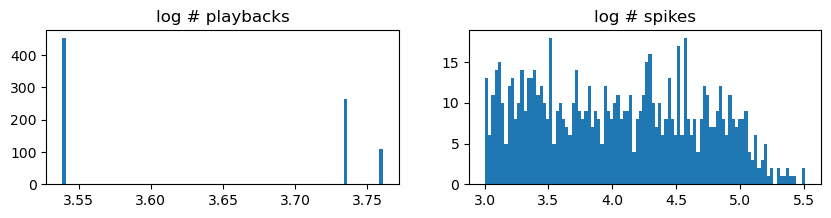

B1279 total # merged units: 827


unit:   0%|          | 0/827 [00:00<?, ?it/s]

[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.
[Parallel(n_jobs=42)]: Done   1 tasks      | elapsed:   30.2s
[Parallel(n_jobs=42)]: Done  14 tasks      | elapsed:   37.8s
[Parallel(n_jobs=42)]: Done  29 tasks      | elapsed:   40.8s
[Parallel(n_jobs=42)]: Done  44 tasks      | elapsed:   43.7s
[Parallel(n_jobs=42)]: Done  61 tasks      | elapsed:   48.9s
[Parallel(n_jobs=42)]: Done  78 tasks      | elapsed:   52.8s
[Parallel(n_jobs=42)]: Done  97 tasks      | elapsed:   57.5s
[Parallel(n_jobs=42)]: Done 116 tasks      | elapsed:  1.1min
[Parallel(n_jobs=42)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=42)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=42)]: Done 181 tasks      | elapsed:  1.4min
[Parallel(n_jobs=42)]: Done 204 tasks      | elapsed:  1.5min
[Parallel(n_jobs=42)]: Done 229 tasks      | elapsed:  1.6min
[Parallel(n_jobs=42)]: Done 254 tasks      | elapsed:  1.7min
[Parallel(n_jobs=42)]: Done 281 tasks      | elapsed:  

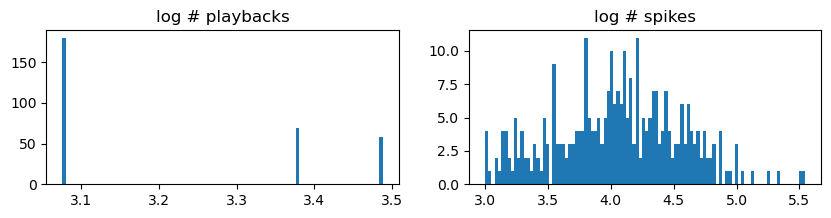

B1500 total # merged units: 307


unit:   0%|          | 0/307 [00:00<?, ?it/s]

[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.
[Parallel(n_jobs=42)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=42)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=42)]: Done  29 tasks      | elapsed:    6.0s
[Parallel(n_jobs=42)]: Done  44 tasks      | elapsed:    7.3s
[Parallel(n_jobs=42)]: Done  61 tasks      | elapsed:   10.3s
[Parallel(n_jobs=42)]: Done  78 tasks      | elapsed:   11.6s
[Parallel(n_jobs=42)]: Done  97 tasks      | elapsed:   14.7s
[Parallel(n_jobs=42)]: Done 116 tasks      | elapsed:   17.1s
[Parallel(n_jobs=42)]: Done 137 tasks      | elapsed:   20.2s
[Parallel(n_jobs=42)]: Done 158 tasks      | elapsed:   23.4s
[Parallel(n_jobs=42)]: Done 181 tasks      | elapsed:   26.6s
[Parallel(n_jobs=42)]: Done 204 tasks      | elapsed:   29.4s
[Parallel(n_jobs=42)]: Done 255 out of 307 | elapsed:   36.3s remaining:    7.4s
[Parallel(n_jobs=42)]: Done 286 out of 307 | elapsed:   39.9s remaining:    2.9s
[Parallel(n_jobs=

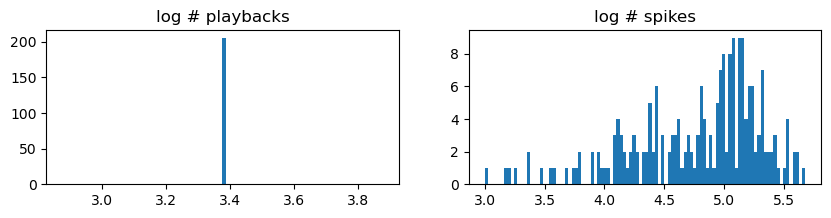

B1239 total # merged units: 206


unit:   0%|          | 0/206 [00:00<?, ?it/s]

[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.
[Parallel(n_jobs=42)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=42)]: Done  14 tasks      | elapsed:    5.0s
[Parallel(n_jobs=42)]: Done  29 tasks      | elapsed:    5.8s
[Parallel(n_jobs=42)]: Done  44 tasks      | elapsed:    7.1s
[Parallel(n_jobs=42)]: Done  61 tasks      | elapsed:    9.2s
[Parallel(n_jobs=42)]: Done  78 tasks      | elapsed:   10.2s
[Parallel(n_jobs=42)]: Done  97 tasks      | elapsed:   12.8s
[Parallel(n_jobs=42)]: Done 116 tasks      | elapsed:   14.9s
[Parallel(n_jobs=42)]: Done 144 out of 206 | elapsed:   18.3s remaining:    7.9s
[Parallel(n_jobs=42)]: Done 165 out of 206 | elapsed:   20.0s remaining:    5.0s
[Parallel(n_jobs=42)]: Done 186 out of 206 | elapsed:   21.9s remaining:    2.4s
[Parallel(n_jobs=42)]: Done 206 out of 206 | elapsed:   23.7s finished


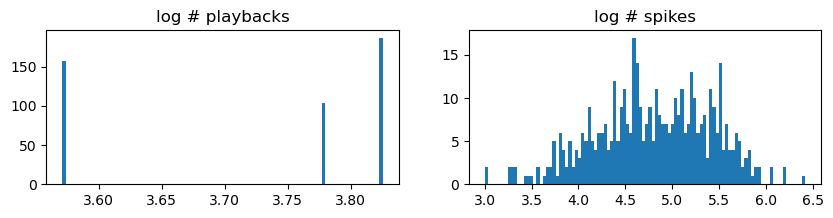

B1459 total # merged units: 447


unit:   0%|          | 0/447 [00:00<?, ?it/s]

[Parallel(n_jobs=42)]: Using backend LokyBackend with 42 concurrent workers.
[Parallel(n_jobs=42)]: Done   1 tasks      | elapsed:   10.6s
[Parallel(n_jobs=42)]: Done  14 tasks      | elapsed:   19.3s
[Parallel(n_jobs=42)]: Done  29 tasks      | elapsed:   22.7s
[Parallel(n_jobs=42)]: Done  44 tasks      | elapsed:   26.7s
[Parallel(n_jobs=42)]: Done  61 tasks      | elapsed:   38.8s
[Parallel(n_jobs=42)]: Done  78 tasks      | elapsed:   45.6s
[Parallel(n_jobs=42)]: Done  97 tasks      | elapsed:   55.0s
[Parallel(n_jobs=42)]: Done 116 tasks      | elapsed:  1.1min
[Parallel(n_jobs=42)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=42)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=42)]: Done 181 tasks      | elapsed:  1.5min
[Parallel(n_jobs=42)]: Done 204 tasks      | elapsed:  1.6min
[Parallel(n_jobs=42)]: Done 229 tasks      | elapsed:  1.8min
[Parallel(n_jobs=42)]: Done 254 tasks      | elapsed:  1.9min
[Parallel(n_jobs=42)]: Done 281 tasks      | elapsed:  

In [15]:
for bird, timestamp, sorter in tqdm(birds):
    spikesorting_folder = (DATA_DIR
                / "spikesorting"
                / bird
                / timestamp)
    recording_summary_df = pd.read_pickle(spikesorting_folder/ 'recording_df.pickle')

    # get units that are to be merged
    merged_units = pd.read_pickle(spikesorting_folder / 'unit_clusters2.pickle')
    merged_units = merged_units.sort_values(by='n_playbacks', ascending=False)
    merged_units = merged_units[merged_units.n_playbacks.astype('float')  > min_playbacks]
    merged_units = merged_units[merged_units.n_spikes > 1000]
    
    plot = True
    if plot:
        fig, axs = plt.subplots(ncols=2, figsize=(10,2))
        axs[0].hist(np.log10(merged_units.n_playbacks.values.astype('float')+1), bins = 100);
        axs[0].set_title('log # playbacks')
        axs[1].hist(np.log10(merged_units.n_spikes.values.astype('float')+1), bins = 100);
        axs[1].set_title('log # spikes')
        plt.show()
        print('{} total # merged units: {}'.format(bird, len(merged_units)))

    ensure_dir(spikesorting_folder / 'unit_statistics' / statistics_timestamp)
    
    Parallel(n_jobs = 42, verbose=10)(
        delayed(get_unit_statistic)(
            unit_to_analyze,
            spikesorting_folder,
            statistics_timestamp,
            recompute=True,
            parallel=True,
            n_interp_point_bins=16,
            similarity_metrics=["correlation", "cosine", "euclidean", "manhattan"],
            
                    )
        for uniti, unit_to_analyze in tqdm(
            merged_units.iterrows(), desc="unit", total=len(merged_units)
        )
    );

### Debugging

In [ ]:
breakme

In [ ]:
np.where(merged_units.cluster_id == 3428)

In [ ]:
Parallel(n_jobs=1, verbose=10)(
    delayed(get_unit_statistic)(
        unit_to_analyze,
        spikesorting_folder,
        statistics_timestamp,
        recompute=True,
        parallel=False,
        save=False,
        plot=False,
    )
    for uniti, unit_to_analyze in tqdm(
        merged_units[:]
        .iterrows(), desc="unit", total=len(merged_units)
    )
)

In [ ]:
??compute_interpolation_sm_and_neurometric_multiple_metrics

### make dataframe

In [16]:
ensure_dir(DATA_DIR / 'unit_statistics' / statistics_timestamp / identifier)

In [17]:
def read_and_unit(i):
    try:
        df = pd.read_pickle(i)
        df['unit'] = i.stem
        return df
    except:
        return

In [20]:
for bird, timestamp, sorter in tqdm(birds):
    print(bird)
    spikesorting_folder = DATA_DIR / "spikesorting" / bird / timestamp
    recording_summary_df = pd.read_pickle(spikesorting_folder / "recording_df.pickle")

    unit_series_save_loc = (
        spikesorting_folder / "unit_statistics" / statistics_timestamp / identifier
    )
    unit_pickles = list(unit_series_save_loc.glob("*.pickle"))
    
    unit_statistics_df = pd.concat(
        #Parallel(n_jobs=1, prefer="threads")(
        Parallel(n_jobs = 10)(
            delayed(read_and_unit)(i)
            for i in tqdm(unit_pickles, leave=False, desc="reading pickles")
        ),
        axis=1,
    ).T

    unit_statistics_df.to_pickle(
        DATA_DIR
        / "unit_statistics"
        / statistics_timestamp
        / identifier
        / "{}.pickle".format(bird)
    )

  0%|          | 0/4 [00:00<?, ?it/s]

B1279


reading pickles:   0%|          | 0/827 [00:00<?, ?it/s]

B1500


reading pickles:   0%|          | 0/307 [00:00<?, ?it/s]

B1239


reading pickles:   0%|          | 0/206 [00:00<?, ?it/s]

B1459


reading pickles:   0%|          | 0/447 [00:00<?, ?it/s]

In [ ]:
len(unit_pickles)

In [ ]:
test = pd.read_pickle(unit_pickles[0])

In [ ]:
pd.DataFrame([test])

In [ ]:
test.rv_euclidean_CF.dtype

In [ ]:
test.sm_euclidean_BE.dtype

In [ ]:
unit_pickles

In [ ]:
!ls -lht /mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/data/spikesorting/B1597/2021-05-14_12-40-20_423998/unit_statistics/2021-10-23_23-02-31_846685/nm_by_interpolation_128/